In [110]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
#loading data
data = pd.read_csv("revenue_5_years.csv")

In [112]:
#studying data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 2 columns):
2013/06/25            3977 non-null object
 1447.852791371217    3977 non-null float64
dtypes: float64(1), object(1)
memory usage: 62.2+ KB


In [113]:
data.head()

,2013/06/25,1447.852791371217
0,2013/06/25,1442.080296
1,2013/06/27,1447.852791
2,2013/06/27,1442.080296
3,2013/06/27,1436.307800
4,2013/06/28,1442.080296


In [114]:
#converting the objects into datetime types
data['dates'] = pd.to_datetime(data.values[:,0])

In [115]:
data.head()

,2013/06/25,1447.852791371217,dates
0,2013/06/25,1442.080296,2013-06-25
1,2013/06/27,1447.852791,2013-06-27
2,2013/06/27,1442.080296,2013-06-27
3,2013/06/27,1436.307800,2013-06-27
4,2013/06/28,1442.080296,2013-06-28


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 3 columns):
2013/06/25            3977 non-null object
 1447.852791371217    3977 non-null float64
dates                 3977 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 93.3+ KB


In [117]:
#adding 3 columns for the dates into day, year, month
data['Day'] = data['dates'].apply(lambda time: time.day)
data['Month'] = data['dates'].apply(lambda time: time.month)
data['Year'] = data['dates'].apply(lambda time: time.year)

In [118]:
data.head()

,2013/06/25,1447.852791371217,dates,Day,Month,Year
0,2013/06/25,1442.080296,2013-06-25,25,6,2013
1,2013/06/27,1447.852791,2013-06-27,27,6,2013
2,2013/06/27,1442.080296,2013-06-27,27,6,2013
3,2013/06/27,1436.307800,2013-06-27,27,6,2013
4,2013/06/28,1442.080296,2013-06-28,28,6,2013


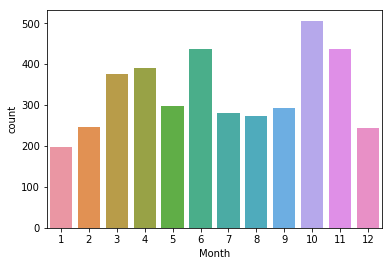

In [119]:
#plotting a graph for month
sns.countplot(x='Month', data=data)

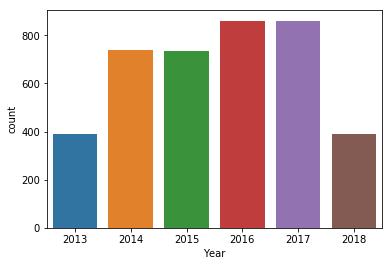

In [120]:
sns.countplot(x='Year', data=data)

In [121]:
#grouping
byMonth = data.groupby('Month').count()
byYear = data.groupby('Year').count()

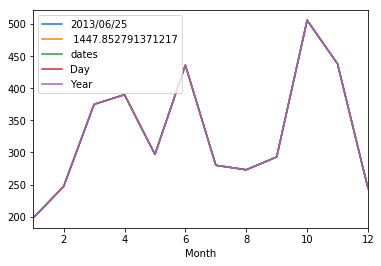

In [122]:
byMonth.plot()

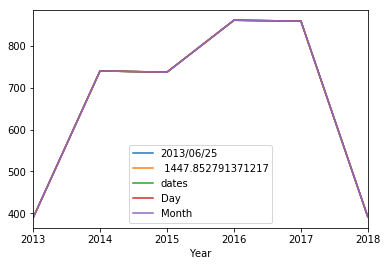

In [123]:
byYear.plot()

In [124]:
src = "revenue graph 5 year.PNG"

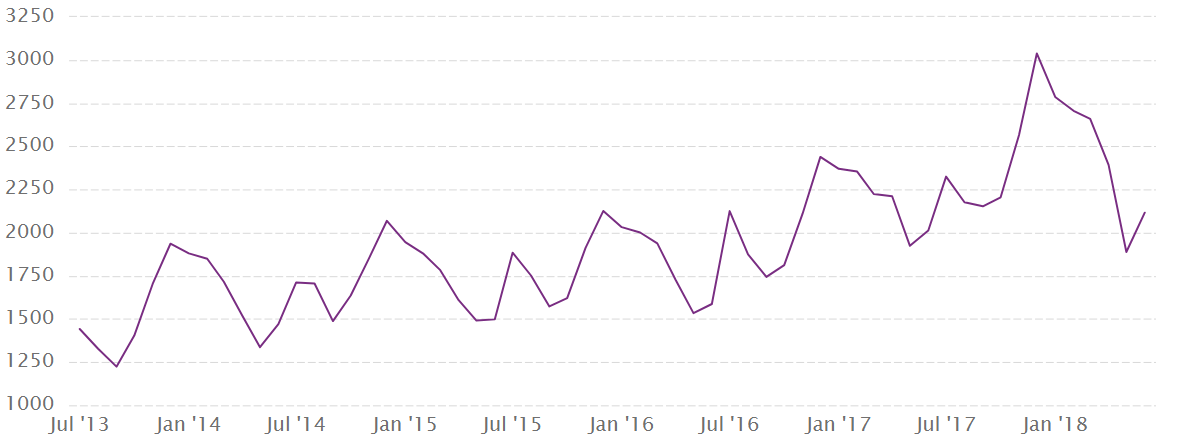

In [125]:
from IPython.display import Image
Image(filename='revenue graph 5 year.PNG')

In [126]:
#hence ve can see that all the data extrected is correct

In [127]:
#getting dependent and independent matrix
X = data.iloc[:,[3,4,5]].values

In [128]:
X

array([[  25,    6, 2013],
       [  27,    6, 2013],
       [  27,    6, 2013],
       ...,
       [  18,    5, 2018],
       [  18,    5, 2018],
       [  18,    5, 2018]], dtype=int64)

In [129]:
y = data.iloc[:, 1].values

In [130]:
y

array([1442.08029562, 1447.85279137, 1442.08029562, ..., 2088.59982023,
       2082.82732448, 2077.05482872])

In [131]:
# we dont categorical data

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
X_train

array([[  13,    6, 2016],
       [  10,    4, 2014],
       [   8,    6, 2014],
       ...,
       [   9,    4, 2014],
       [   8,   11, 2015],
       [   4,    6, 2016]], dtype=int64)

In [134]:
X_test

array([[  25,    3, 2015],
       [  11,    2, 2016],
       [   6,    7, 2017],
       ...,
       [   5,    4, 2014],
       [   8,    4, 2016],
       [  27,    1, 2017]], dtype=int64)

In [135]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [136]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
y_predict = regressor.predict(X_test)

In [138]:
X_train_year = X_train[:, 2]
X_train_year = np.squeeze(np.asarray(X_train_year))
X_test_year = X_test[:, 2]

In [139]:
X_train_year

array([2016, 2014, 2014, ..., 2014, 2015, 2016], dtype=int64)

In [140]:
#
regressor_year = LinearRegression()
regressor_year.fit(X_train_year.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

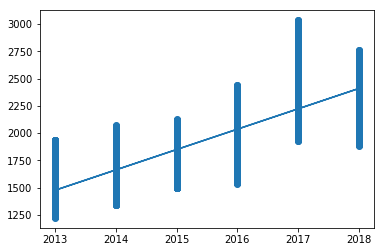

In [141]:
plt.scatter(X_train_year, y_train)
plt.plot(X_train_year, regressor_year.predict(X_train_year.reshape(-1, 1)))

In [142]:
X_test_year = X_test[:, 2]

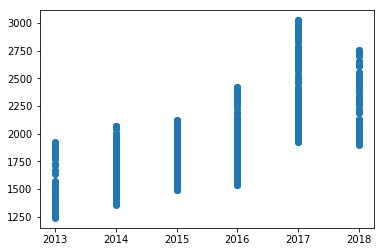

In [143]:

plt.scatter(X_test_year, y_test)
#plt.plot(X_train, regressor.predict(X_train_year.reshape(-1, 1)))

In [144]:
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.6695983046329704


In [145]:
from sklearn.gaussian_process import GaussianProcessRegressor
G_regressor = GaussianProcessRegressor()

In [146]:
G_regressor.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [147]:
G_regressor.score(X_train, y_train)

0.9995484397819581

In [148]:
#hence we can see that model is highly overfitted

### solving by months

In [149]:
dates = data.iloc[:, -1].values

In [150]:
dates

array([2013, 2013, 2013, ..., 2018, 2018, 2018], dtype=int64)

In [151]:
prices = data.iloc[:, 1].values
prices

array([1442.08029562, 1447.85279137, 1442.08029562, ..., 2088.59982023,
       2082.82732448, 2077.05482872])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(dates, prices, test_size=0.2)

In [153]:
lin_mod = LinearRegression()

In [154]:
lin_mod.fit(X_train.reshape(-1, 1) , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
lin_mod.predict(X_test.reshape(-1, 1))

array([2225.80812121, 2037.39172651, 2414.22451591, 1848.97533182,
       2037.39172651, 2225.80812121, 1660.55893712, 1660.55893712,
       1660.55893712, 1472.14254242, 1848.97533182, 2037.39172651,
       1660.55893712, 1660.55893712, 2225.80812121, 2414.22451591,
       1848.97533182, 2225.80812121, 1848.97533182, 1660.55893712,
       2225.80812121, 1848.97533182, 1472.14254242, 1848.97533182,
       2414.22451591, 1848.97533182, 2037.39172651, 1660.55893712,
       2225.80812121, 2225.80812121, 2414.22451591, 1848.97533182,
       2225.80812121, 2414.22451591, 2037.39172651, 1848.97533182,
       1660.55893712, 1848.97533182, 2225.80812121, 1660.55893712,
       2225.80812121, 1660.55893712, 1848.97533182, 2225.80812121,
       2037.39172651, 2225.80812121, 1848.97533182, 2225.80812121,
       2225.80812121, 1848.97533182, 1848.97533182, 1660.55893712,
       1472.14254242, 1660.55893712, 2225.80812121, 2037.39172651,
       1472.14254242, 1660.55893712, 2037.39172651, 2225.80812

In [156]:
y_test

array([2036.64735843, 1771.11255368, 2671.62189154, 2042.41985419,
       2007.78487966, 2740.89184061, 1488.26026166, 1505.57774893,
       1649.89014281, 1395.90032957, 1644.11764706, 1672.98012584,
       1361.26535504, 1609.48267253, 2152.09727354, 2631.21442125,
       1707.61510037, 2111.68980326, 2094.37231599, 1494.03275742,
       2706.25686607, 1574.84769799, 1332.40287626, 1869.24498152,
       2192.50474383, 1597.93768101, 1794.2025367 , 1828.83751124,
       3012.19914112, 2048.19234995, 2642.75941276, 1742.2500749 ,
       2175.18725657, 2746.66433636, 2007.78487966, 1499.80525317,
       1978.92240088, 1765.34005792, 2579.26195945, 1621.02766404,
       2042.41985419, 1597.93768101, 1586.3926895 , 2567.71696794,
       1632.57265555, 1944.28742635, 1511.35024468, 2007.78487966,
       1967.37740937, 1626.80015979, 1690.2976131 , 1401.67282533,
       1644.11764706, 1621.02766404, 2180.95975232, 2429.17706981,
       1332.40287626, 1597.93768101, 1921.19744332, 2175.18725

In [157]:
lin_mod.score(X_test.reshape(-1, 1), y_test)

0.4985132218411573

In [158]:
from sklearn.preprocessing import LabelEncoder
lbl_X = LabelEncoder()
Xenc = dates
Xenc = lbl_X.fit_transform(Xenc)

In [159]:
Xenc

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [160]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categorical_features = [0])
Xenc = onehot.fit_transform(Xenc.reshape(-1, 1)).toarray()

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xenc, y, test_size=0.2)

In [162]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_train = scale_X.fit_transform(X_train)
X_test = scale_X.transform(X_test)

In [163]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [164]:
lin_reg.predict(X_test)

array([2400.52042659, 1936.77042659, 1684.39542659, 1936.77042659,
       1936.77042659, 1936.77042659, 2400.52042659, 2400.52042659,
       2400.52042659, 1763.02042659, 1763.02042659, 1763.02042659,
       1763.02042659, 1936.77042659, 2400.52042659, 2400.52042659,
       1936.77042659, 1684.39542659, 2400.52042659, 1936.77042659,
       1763.02042659, 1936.77042659, 1763.02042659, 1936.77042659,
       1684.39542659, 2294.14542659, 1561.52042659, 1684.39542659,
       2400.52042659, 1763.02042659, 1763.02042659, 2294.14542659,
       1763.02042659, 1936.77042659, 1763.02042659, 1684.39542659,
       1763.02042659, 1763.02042659, 2400.52042659, 1763.02042659,
       1936.77042659, 1763.02042659, 1936.77042659, 1763.02042659,
       1561.52042659, 2294.14542659, 1684.39542659, 1561.52042659,
       1684.39542659, 2400.52042659, 1936.77042659, 1936.77042659,
       2400.52042659, 1684.39542659, 1561.52042659, 2400.52042659,
       1684.39542659, 2294.14542659, 1936.77042659, 1684.39542

In [165]:
lin_reg.score(X_train, y_train)

0.6096128871284657

In [166]:
#hence by using categorical data we get increase in accuracy

In [171]:
predicted_price = lin_reg.predict(X_test)  

#predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  

predicted_price.plot(figsize=(10,5))  

#y_test.plot()  
plt.plot(y_test)
plt.legend(['predicted_price','actual_price'])  

plt.ylabel("Gold ETF Price")  

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

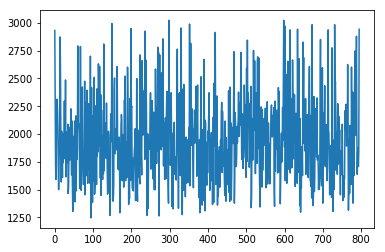

In [172]:
plt.plot(y_test)